# 작업형 제 1유형 예시문제 (코드기여자 : 익명요청 ㅠ)

```{admonition} Question 1
**mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소 최대 척도(min-max scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.**
```

In [1]:
mtcars<- read.csv("https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv",row.names=1)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [2]:
## 1) 사용자 정의 함수

min_max_scale<-function(x){
  return ((x-min(x))/(max(x)-min(x)))
}

ans11 <- min_max_scale(mtcars$qsec)
sum(ans11 > 0.5)

[1] 9

In [3]:
#colab에서는 세션마다 패키지를 설치 필요, 편의서을 위해 아래 함수를 작성함
check_package <- function(name){
    if(!name %in% rownames(installed.packages())){
        install.packages(name)
    }
}

check_package("caret")

In [4]:
## 2) caret 라이브러리 사용

library(caret)
min_max_model <- preProcess(mtcars, method="range")
ans12 <- predict(min_max_model, mtcars)$qsec
sum(ans12 > 0.5)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


[1] 9

```{admonition} Question 2
**mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 표준정규분포 데이터 표준화 (standardization) 변환 후 최대, 최소값을 각각 구하시오.**
```

In [ ]:
ans21 <- scale(mtcars$qsec)

In [5]:
## 1) scale() 함수 이용


range(ans21)[2:1]

[1]  2.826755 -1.874010

In [ ]:
standardization <- function(x){
  return((x-mean(x))/sd(x))
}

ans22 <- standardization(mtcars$qsec)

In [6]:
## 2) 사용자 정의 함수

range(ans22)[2:1]

[1]  2.826755 -1.874010

In [ ]:

stand_model <- preProcess(mtcars) #default: standardization
ans23 <- predict(stand_model, mtcars)$qsec

In [7]:
## 3) caret 라이브러리 사용

range(ans23)[2:1]

[1]  2.826755 -1.874010

```{admonition} Question 3
**mtcars 데이터셋(mtcars.csv)의 wt 컬럼의 이상치(IQR *1.5 외부에 존재하는)값들을 outlier 변수에 저장하라**
```

In [8]:
# Q1, Q3, IQR 계산
q25 <- quantile(mtcars$wt, 0.25)
q75 <- quantile(mtcars$wt, 0.75)
iqr <- q75 - q25

flag <- mtcars$wt >= (q75+1.5*iqr) | mtcars$wt <= (q25-1.5*iqr)
outlier <- mtcars$wt[flag]

In [9]:
# outlier 저장
outlier

[1] 5.250 5.424 5.345

```{admonition} Question 4
**mtcars 데이터셋에서 mpg변수와 나머지 변수들의 상관계수를 구하여 다음과 같이 내림차순 정렬하여 표현하라**
```

In [10]:
as.data.frame(sort(cor(mtcars)[-1,1],decreasing = T))

,"sort(cor(mtcars)[-1, 1], decreasing = T)"
drat,0.6811719
vs,0.6640389
am,0.5998324
gear,0.4802848
qsec,0.4186840
carb,-0.5509251
hp,-0.7761684
disp,-0.8475514
cyl,-0.8521620
wt,-0.8676594


```{admonition} Question 5
**mtcars 데이터셋에서 mpg변수를 제외하고 데이터 정규화 (standardscaler) 과정을 진행한 이후 PCA를 통해 변수 축소를 하려한다. 누적설명 분산량이 92%를 넘기기 위해서는 몇개의 주성분을 선택해야하는지 설명하라**
```

In [ ]:
mtcars_q5 <- mtcars[,-1]
mtcars_q5_scale <- scale(mtcars_q5)

pca <- prcomp(mtcars_q5_scale)

In [11]:

summary(pca)

Importance of components:
                         PC1   PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.400 1.628 0.77280 0.51914 0.47143 0.45839 0.36458
Proportion of Variance 0.576 0.265 0.05972 0.02695 0.02223 0.02101 0.01329
Cumulative Proportion  0.576 0.841 0.90071 0.92766 0.94988 0.97089 0.98419
                           PC8     PC9    PC10
Standard deviation     0.28405 0.23163 0.15426
Proportion of Variance 0.00807 0.00537 0.00238
Cumulative Proportion  0.99226 0.99762 1.00000

> 4개의 주성분을 사용할 때 Cumulative Proportion이 92%를 넘김

```{admonition} Question 6
**mtcars 의 index는 (업체명) - (모델명)으로 구성된다. (valiant는 업체명) mtcars에 'brand' 컬럼을 추가하고 value 값으로 업체명을 입력하라**
```

In [12]:
## 1) sapply 사용

sapply(strsplit(rownames(mtcars)," "),`[`,1)

[1] "Mazda"    "Mazda"    "Datsun"   "Hornet"   "Hornet"   "Valiant" 
 [7] "Duster"   "Merc"     "Merc"     "Merc"     "Merc"     "Merc"    
[13] "Merc"     "Merc"     "Cadillac" "Lincoln"  "Chrysler" "Fiat"    
[19] "Honda"    "Toyota"   "Toyota"   "Dodge"    "AMC"      "Camaro"  
[25] "Pontiac"  "Fiat"     "Porsche"  "Lotus"    "Ford"     "Ferrari" 
[31] "Maserati" "Volvo"

In [ ]:
tmp <- strsplit(rownames(mtcars)," ")
tmp2 <- c()

for(i in 1:length(tmp)){
    tmp2 <- c(tmp2,tmp[[i]][1])
}

mtcars$brand <- as.factor(tmp2)

In [13]:
## 2) for문 사용
# - strsplit하면 list형태로 분리됨


head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Mazda
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Mazda
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Datsun
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Hornet
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Hornet
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,Valiant


```{admonition} Question 7
**추가된 brand 컬럼을 제외한 모든 컬럼을 통해 pca를 실시한다. 2개의 주성분과 brand컬럼으로 구성된 새로운 데이터 프레임을 출력하고, brand에 따른 2개 주성분을 시각화하여라 (brand를 구분 할수 있도록 색이다른 scatterplot, legend를 표시한다)**
```

In [14]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
                                                                
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
                  

변수간 단위가 다르므로, scale 필요

In [15]:
pca2 <- prcomp(mtcars[,-12],scale=T)
mtcars <- cbind(mtcars, pca2$x[,1:2])

In [16]:
check_package("ggplot2")

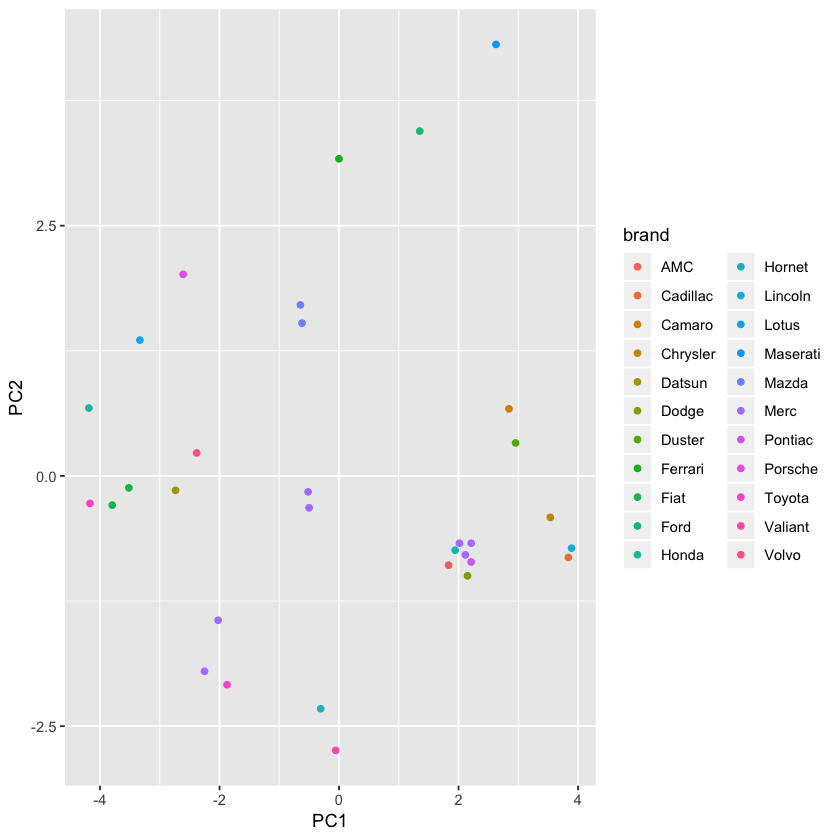

In [17]:
library(ggplot2)

ggplot(mtcars,aes(x=PC1,y=PC2,color=brand))+geom_point()+
  labs(color="brand")

#참고, 환경에 따라 PC2가 -PC2 값으로 나오기도 함.